In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import scipy.stats
from scipy.stats import t, norm, ttest_ind
import decimal
%matplotlib inline

In [2]:
def t_test_for_one_group(x, diff,alfa,pop_mean=0):
    n = len(x)
    sd = np.std(x,ddof=1)
    se = sd/np.sqrt(n)
    ts = (np.mean(x) - pop_mean - diff)/se
    p_val = t.sf(np.abs(ts),df=n-1) #test jednostronny
    if diff == 0: #dla testu z samą średnią populacyjną
        down_confine = - se*t.ppf(1-alfa,df = n-1)+ pop_mean
    else:
        down_confine = - se*t.ppf(1-alfa,df = n-1) + pop_mean + diff - pop_mean #dla testu z istotnością praktyczną - przesunięcie krzywej o stałą 
    return p_val, down_confine, np.mean(x) #test jednostronny - zwraca tylko dolną granicę przedziału

In [3]:
def get_normal_sample(n,mean,sd):
    return np.random.normal(loc=mean,scale=sd,size=n)


In [4]:
def sim(n,mean,sd,how_many):
    return [get_normal_sample(n,mean,sd)for i in range(how_many)]# for i in range(hw_mn)] # zmienne są z rozkładu normalnego,
# więc pominąłem część "losowania" średnich

In [5]:
def results(n,mean_pop,mean_group,sd,how_many,diff,alfa): #how_many = wielkość próby
    #dla każdej próby zwraca wartość p i dolną granicę przedziału
    result_0 = []
    result_diff = []
    simulation = sim(n,mean_group,sd,how_many)
    for sample in simulation:
        p0,d0,m0 = t_test_for_one_group(sample,0,alfa,mean_pop)
        p1,d1,m1 = t_test_for_one_group(sample,diff,alfa,mean_pop)
        result_0.append([p0,d0,m0])
        result_diff.append([p1,d1,m1])
    return result_0, result_diff    

In [6]:
def end(n,mean_pop,mean_group,sd,how_many,alfa): # pętla służy do wybierania wartości diff - granicy, którą uważa się za 
    #ważną - dałem taki zakres, żeby zawierał średnią populacyjną i średnią z próby
    diff = 0
    ii = [] #wartości na osi X
    a = [] # ilość p wartości, dolnych granic większych od średniej z próby dla grupy uwzględniającej istotność praktyczną
    b = [] # to co w a - dla grupy "kontrolnej"
    for i in range(100,170):
        ii.append(i*0.1)
        diff = i*0.1
        g1,g2 = results(n,mean_pop,mean_group,sd,how_many,diff,alfa)
        a.append(len([i for i in g2 if i[0] < 0.05 and i[1] < i[2]]))
        b.append(len([i for i in g1 if i[0] < 0.05 and i[1] < i[2]]))
    return (ii,a,b)

In [7]:
ii,a,b = end(50,10,14,2,100,0.05) #pop - 10, #sample - 14

(9.0, 20.0)

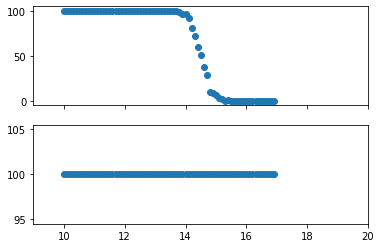

In [8]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True) #wykres wyglądał tak samo dla o wiele większych parametrów - wykres wyglądał tak samo
ax1.scatter(ii, a)
ax2.scatter(ii, b)
plt.xlim(9,20,1)

In [ ]:
def boot(n,mean_pop,mean_group,sd,how_many,alfa): # pętla służy do wybierania wartości diff - granicy, którą uważa się za 
    #ważną - dałem taki zakres, żeby zawierał średnią populacyjną i średnią z próby
    diff = 0
    ii = [] #wartości na osi X
    a = [] # ilość p wartości, dolnych granic większych od średniej z próby dla grupy uwzględniającej istotność praktyczną
    b = [] # to co w a - dla grupy "kontrolnej"
    for i in range(100,170):
        ii.append(i*0.1)
        diff = i*0.1
        g1,g2 = results(n,mean_pop,mean_group,sd,how_many,diff,alfa)
        a.append(len([i for i in g2 if i[0] < 0.05 and i[1] < i[2]]))
        b.append(len([i for i in g1 if i[0] < 0.05 and i[1] < i[2]]))
    return (ii,a,b)